In [1]:
import os 

base_dir = '/Volumes/KESU/House Prices/'
dataset_dir = os.path.join(base_dir, 'dataset')

In [2]:
import pandas as pd 

df_train = pd.read_csv(os.path.join(dataset_dir, 'train.csv'))
df_test = pd.read_csv(os.path.join(dataset_dir, 'test.csv'))

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.shape

(1460, 81)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
nummerics_var = list(df_train.select_dtypes(include=numerics).columns)
df_train = df_train[nummerics_var]
df_train.shape

(1460, 38)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(labels=['SalePrice'], axis=1), df_train['SalePrice'], 
                                                                                        test_size=.3, random_state=42)
X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [7]:
mi = mutual_info_regression(X_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=True)

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


MiscVal          0.000000
3SsnPorch        0.000000
BsmtHalfBath     0.003612
MoSold           0.003814
PoolArea         0.003875
YrSold           0.004017
BsmtFinSF2       0.006412
Id               0.006726
LowQualFinSF     0.007319
KitchenAbvGr     0.016849
ScreenPorch      0.019102
EnclosedPorch    0.020114
BsmtFullBath     0.022883
HalfBath         0.068887
MasVnrArea       0.070710
WoodDeckSF       0.071743
BedroomAbvGr     0.072249
OverallCond      0.110948
BsmtFinSF1       0.142326
BsmtUnfSF        0.145938
LotArea          0.150446
Fireplaces       0.156343
OpenPorchSF      0.156840
TotRmsAbvGrd     0.170663
LotFrontage      0.197112
2ndFlrSF         0.218538
FullBath         0.229851
YearRemodAdd     0.257765
GarageYrBlt      0.259702
1stFlrSF         0.286313
MSSubClass       0.291545
TotalBsmtSF      0.315598
YearBuilt        0.324045
GarageArea       0.342787
GarageCars       0.358642
GrLivArea        0.450244
OverallQual      0.516710
dtype: float64

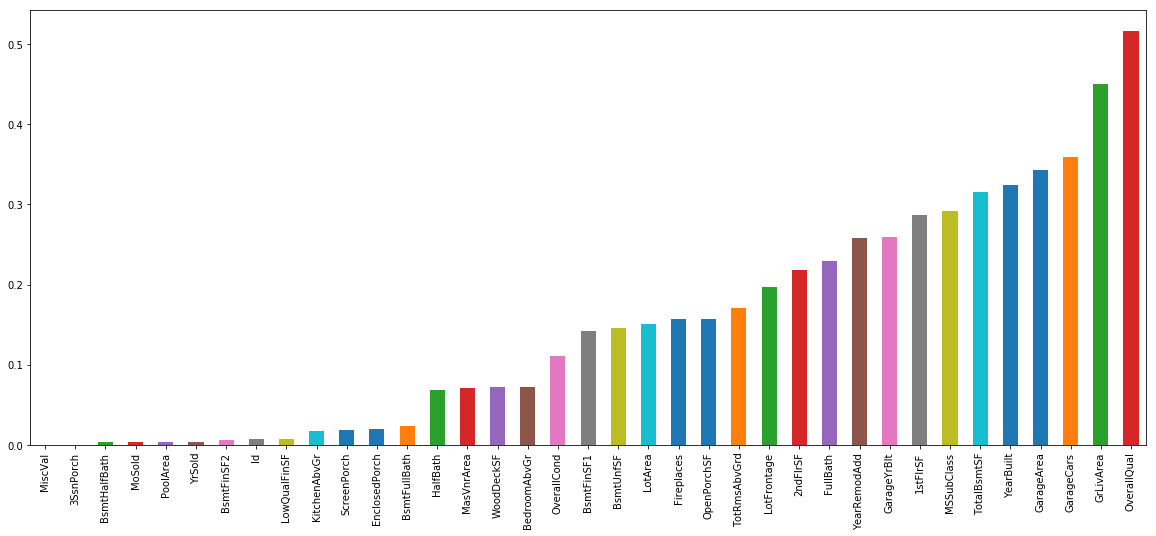

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
mi.sort_values(ascending=True).plot.bar(figsize=(20.,8))

In [9]:
from sklearn.feature_selection import SelectPercentile

sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')